# Problem 2: Europe countries security 

Manuel Jiménez Haro


The file crim gen.tsv contains the number of crimes reported to the police by year and by country. (http://ec.europa.eu/eurostat).

- Which are the most secure countries in Europe?
- Use different plot types to compare the number of crimes within its causes between countries.

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

In [2]:
countries = ["Italy","Spain","Denmark","France","Norway","Finland","Portugal"]
back = mpimg.imread("europe_map.png")
map_coordinates = [-18.09,35.31,32.1,66.68]         ##-- parecn ser los ejes de x e y
coords = {'Italy': (11, 41), 
          'Spain': (-3,38), 
          'Denmark': (9,53),
          'France': (2, 44), 
          'Norway': (8,58), 
          'Finland': (25, 61), 
          'Portugal': (-9, 38)}

In [3]:
crimes = pd.read_csv('crim_gen.tsv', sep=',', na_values=': ')
crimes = crimes[crimes.country.isin(['IT','ES','DK','FR','NO','FI','PT'])]  ##-- he cambiado DE por DK pq era Alemania sino
crimes = crimes.replace(['IT','ES','DK','FR','NO','FI','PT'],
                        ["Italy","Spain","Denmark","France","Norway","Finland","Portugal"])

                        
population = pd.read_csv('population_total.csv', sep=',', na_values=': ')
population = population[population.country.isin(["Italy","Spain","Denmark","France","Norway","Finland","Portugal"])]
crimes = crimes.set_index('country')
population = population.set_index('country')

In [4]:
type_crime = np.unique(list(crimes.iccs))
years = crimes.columns[2:]
population = population.sort_index()
crimes = crimes.sort_index()

In [5]:
total_crimes = crimes.query('iccs == "TOTAL"')
homicides = crimes.query('iccs == "HCIDE"')[years]
drugs = crimes.query('iccs == "DRUGT"')[years]
population = population[years]
total_crimes = total_crimes[years]

#### Lineplots

Primero vamos a ver un gráfico de líneas general del total de crímenes por país y evolución a lo largo de los años.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

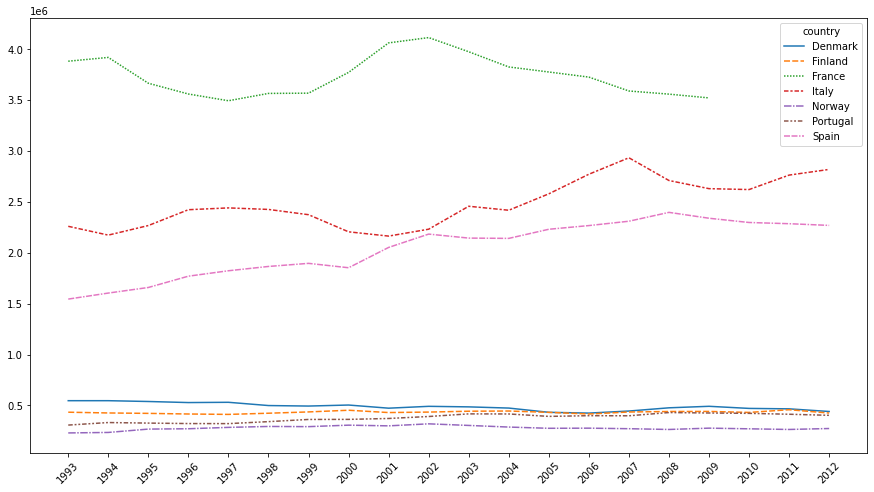

In [6]:
df_total_crimes = total_crimes.T

df_total_crimes=df_total_crimes.sort_index(axis=0)

plt.figure(figsize = (15,8))
ax = sns.lineplot(data= df_total_crimes)

plt.xticks(rotation=45)


Vemos que Francia, Italia y España son los paises con los valores más altos a lo largo de los años.

#### Stacked bars

Ahora vamos a diseccionarlo por tipo de delito.

<AxesSubplot:xlabel='country'>

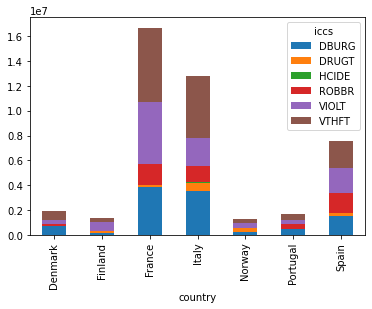

In [7]:
crimes['Total']=crimes.iloc[:,3:22].sum(axis=1)

new_crimes=crimes.reset_index()

new_crimes=new_crimes.rename(columns={"index": "country"})

cols = ['iccs', 'Total']

new_crimes = crimes[cols]

new_crimes = new_crimes.pivot( columns='iccs', values='Total')

new_crimes_1 = new_crimes.drop('TOTAL', axis=1)

new_crimes_1.plot.bar(stacked=True)

#### Ratio crímenes/population

In [8]:
pop = population.copy()

pop['Total_pop'] = pop.sum(axis=1)

pop = pop[['Total_pop']]

pop

new_crimes2 =new_crimes[['TOTAL']]

crim_pop = pd.concat([pop, new_crimes2], axis=1)

crim_pop['ratio'] = (crim_pop['TOTAL']/ crim_pop['Total_pop']*100).round(2)

crim_pop = crim_pop.sort_values(by='ratio', ascending=False)

print(crim_pop)

           Total_pop       TOTAL  ratio
country                                
Denmark    107740000   9325022.0   8.66
Finland    104660000   8234727.0   7.87
Norway      91970000   5292712.0   5.75
France    1210400000  63570633.0   5.25
Spain      857800000  38664333.0   4.51
Italy     1165300000  46847569.0   4.02
Portugal   208600000   7158533.0   3.43


Vemos que a pesar de lo visto en las gráficas en niveles totales, el ratio de crimen per capita en los países nordicos es superioor al de los del sur.

#### Mapa

In [29]:
crim_pop = crim_pop.sort_values('country')

In [30]:
coo= pd.DataFrame(coords)

coo = coo.T

coo = coo.sort_index()

coo['x']=coo.iloc[:,0]

coo['y']=coo.iloc[:,1]

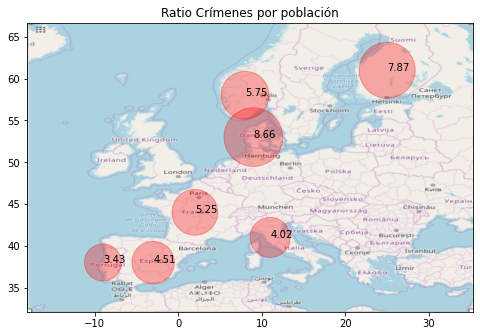

In [44]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(coo.x, coo.y, c='r', s=crim_pop['ratio']*400, alpha = 0.3)
ax.set_title('Ratio Crímenes por población')
ax.set_xlim(map_coordinates[0],map_coordinates[1])
ax.set_ylim(map_coordinates[2],map_coordinates[3])
ax.imshow(back, zorder=0, extent = map_coordinates, aspect= 'equal')

for i, txt in enumerate(crim_pop.ratio):
    ax.annotate(txt, (coo.x[i], coo.y[i]))